# Mixup

The [mixup paper](https://arxiv.org/abs/1710.09412) is for deep learning. Would it work with general linear models?

In [1]:
#install.packages("glmnetUtils")

In [2]:
library(ggplot2)
library(glmnet)
library(glmnetUtils)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘glmnetUtils’

The following objects are masked from ‘package:glmnet’:

    cv.glmnet, glmnet



Can we relearn the relationship

In [3]:
df <- data.frame(
    y1 = seq(1, 100) * 5,
    y2 = seq(1, 100) / 23 - 8
)

df$y1 <- df$y1 - mean(df$y1)
df$y2 <- df$y2 - mean(df$y2)

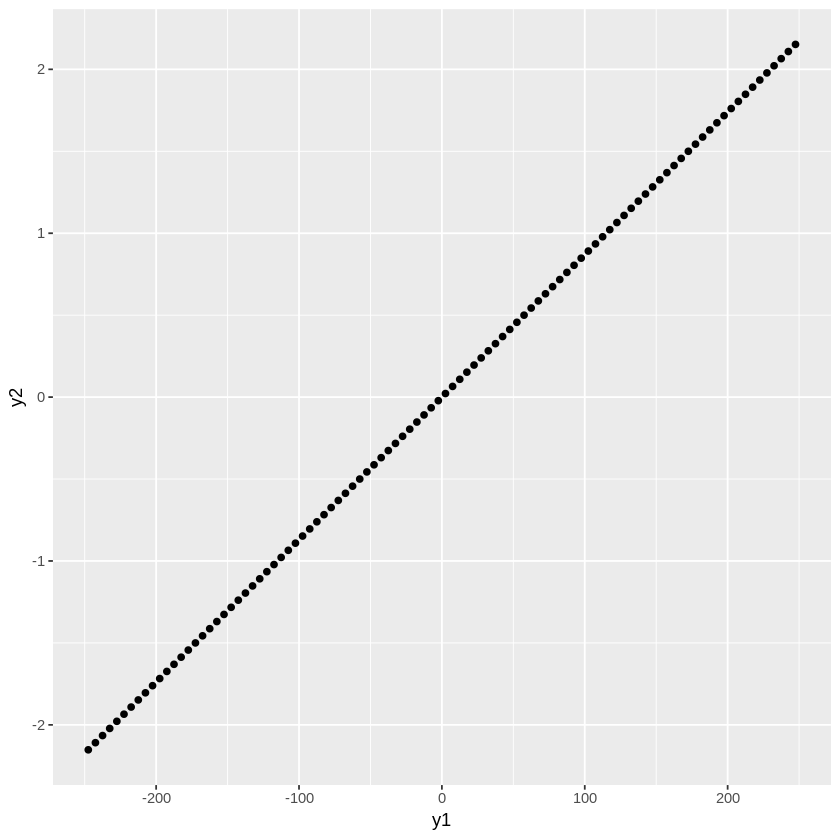

In [4]:
ggplot(df) + geom_point(aes(y1, y2))

In [5]:
x.prop <- runif(length(df$y1) * length(df$y2))

In [6]:
head(x.prop)

[1] 0.72414850 0.06134125 0.06064969 0.22175642 0.02617917 0.39783096

## Exhaustive combination

See https://stackoverflow.com/questions/15162741/what-is-rs-crossproduct-function

In [9]:
z <- outer(df$y1, df$y2, FUN = "+")

In [10]:
length(c(z))

[1] 10000

In [12]:
y1rep <- rep(df$y1, length(df$y2))

In [13]:
y2rep <- rep(df$y2, length(df$y1))

In [14]:
bigdf <- data.frame(
    posy1 = rep(0:49, times=length(df$y2)),
    posy2 = rep(0:49, each=length(df$y1)),
    y1 = y1rep,
    y2 = y2rep,
    combo = c(z),
    portion = 0.5
)

In [15]:
head(bigdf)
tail(bigdf)

posy1,posy2,y1,y2,combo,portion
0,0,-247.5,-2.152174,-249.6522,0.5
1,0,-242.5,-2.108696,-244.6522,0.5
2,0,-237.5,-2.065217,-239.6522,0.5
3,0,-232.5,-2.021739,-234.6522,0.5
4,0,-227.5,-1.978261,-229.6522,0.5
5,0,-222.5,-1.934783,-224.6522,0.5


,posy1,posy2,y1,y2,combo,portion
9995,44,49,222.5,1.934783,224.6522,0.5
9996,45,49,227.5,1.978261,229.6522,0.5
9997,46,49,232.5,2.021739,234.6522,0.5
9998,47,49,237.5,2.065217,239.6522,0.5
9999,48,49,242.5,2.108696,244.6522,0.5
10000,49,49,247.5,2.152174,249.6522,0.5


## Can we jointly learn the two models using their linear combination?

In [16]:
summary(gmod <- glm(combo ~ posy1 + posy2 + portion, data=bigdf))


Call:
glm(formula = combo ~ posy1 + posy2 + portion, data = bigdf)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-126.1  -124.5     0.0   124.5   126.1  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -123.56522    3.25174 -38.000   <2e-16 ***
posy1          5.00000    0.08664  57.713   <2e-16 ***
posy2          0.04348    0.08664   0.502    0.616    
portion             NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 15630.87)

    Null deviance: 208328251  on 9999  degrees of freedom
Residual deviance: 156261815  on 9997  degrees of freedom
AIC: 124954

Number of Fisher Scoring iterations: 2


### This is the same result as we would learn for the individual models

In [17]:
summary(glm(y1 ~ posy1, data=bigdf))


Call:
glm(formula = y1 ~ posy1, data = bigdf)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
  -125    -125       0     125     125  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -122.50000    2.46321  -49.73   <2e-16 ***
posy1          5.00000    0.08663   57.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 15628.13)

    Null deviance: 208312500  on 9999  degrees of freedom
Residual deviance: 156250000  on 9998  degrees of freedom
AIC: 124951

Number of Fisher Scoring iterations: 2


In [18]:
summary(glm(y2 ~ posy1, data=bigdf))


Call:
glm(formula = y2 ~ posy1, data = bigdf)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.087  -1.087   0.000   1.087   1.087  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0652174  0.0214192  -49.73   <2e-16 ***
posy1        0.0434783  0.0007533   57.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.181711)

    Null deviance: 15751  on 9999  degrees of freedom
Residual deviance: 11815  on 9998  degrees of freedom
AIC: 30052

Number of Fisher Scoring iterations: 2
